In [ ]:
## importamos algumas bibliotecas que serão usadas
import numpy as np  # Para um mínimo de matemática
import matplotlib.pyplot as plt # Para gráficos

# MAP2321 - EP1: Zeros de funções


**Nome:** Narayan Shimanoe Lisboa

**Número USP:** 14600141

**Turma:** 2


O objetivo deste EP é implementar e estudar as principais propriedades de métodos iterativos aproximando zeros de funções (dicotomia, ponto fixo e Newton). Essa implementação será motivada por um problema prático: determinar o volume de líquido em um tanque esférico em função da altura do líquido. No final deste EP, também veremos uma introdução ao método de Newton para sistemas de equações não-lineares.

**Orientações:**
- Salve uma cópia deste notebook para editá-lo.
- Utilize o índice à esquerda para identificar as questões que precisam ser respondidas.
- As respostas das questões deverão ser respondidas nos espaços indicados abaixo.
- Envie o link do seu notebook na página de entrega da atividade no Moodle da disciplina.
- Data limite de entrega:

<font color='red'>
IMPORTANTE: o problema descrito na Parte 1 deste EP depende de um parâmetro $0 < \alpha < 1$. Você deverá usar como $\alpha$ o valor dado pelos dois últimos digitos do seu número USP, dividido por 200. Por exemplo, se seu número USP for 12345678, então você deve usar
$$
\alpha = \frac{78}{200} = 0.39
$$

Complete e rode a célula abaixo indicando seu valor de $\alpha$.
</font>



In [ ]:
# Meu Numero USP é 14600141 portanto meu alpha é 41/200
alpha = 41/200
print(alpha)

0.205


#Parte 1 - O problema do tanque esférico

## 1.1. Formulação do problema


**Problema:**
Deseja-se construir uma escala em uma vareta para medir a fração do volume ocupado por um líquido em um tanque esférico. Inserindo-se a vareta na parte superior do tanque até o fundo, queremos estimar a fração do volume ocupado pelo líquido observando-se a parte molhada da vareta. Para isso, escolhemos alguns valores de referência para a fração do volume e marcamos as respectivas alturas na vareta. Este procedimento equivale a determinar alturas do líquido correspondentes a frações pré-especificadas do volume.

**Modelagem:**
Para equacionar o problema, precisamos relacionar o volume ocupado pelo líquido com a sua altura (ver figura abaixo). Podemos observar que o volume ocupado pelo líquido é igual ao volume da calota esférica de altura $h$, cuja fórmula é
$$
    V(h) = \frac{\pi h^2}{3}(3r - h),
$$
onde $V(h)$ denota o volume do líquido como *função* da altura $h$. Na expressão acima, também utilizamos o raio $r$ da esfera.



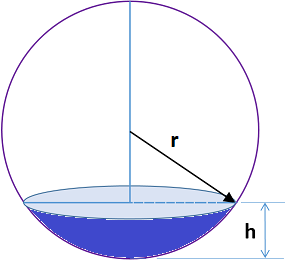

 Como o volume total $V_T$ da esfera de raio $r$ é igual a $\frac{4}{3}\pi r^3$, segue que a fração do volume ocupado pelo líquido é igual a
$$
    \frac{V(h)}{V_T} = \frac{h^2(3r - h)}{4r^3}.
$$

O problema pode então ser equacionado assim: dada uma fração $\alpha$ do volume, determine $h$ tal que $\frac{V(h)}{V_T} = \alpha$, ou seja, determine $h$ tal que
$$
    \frac{h^2(3r - h)}{4r^3} = \alpha .
$$
Note que $\alpha$ está entre $0$ e $1$ e para $\alpha=0$ e $\alpha=1$ sabemos as respostas (quais são?). Logo, nos restringiremos a $0 \lt \alpha \lt 1$ (sabemos a solução também para $\alpha=0.5$, mas vamos ignorar isso por enquanto).


**Manipulação e adimensionalização:**
Uma pequena manipulação na última equação permite-nos escrevê-la como
$$
    \frac{1}{4}\left(\frac{h}{r}\right)^2\left(3 - \frac{h}{r}\right) = \alpha,
$$
explicitando a propriedade interessante de que o lado esquerdo depende apenas da razão $\frac{h}{r}$ entre a altura do líquido e o raio da esfera. Podemos então resolver o problema determinando o valor da variável *adimensional* $x = \frac{h}{r}$ que resolve a equação
$$
    \frac{1}{4}x^2(3 -x) = \alpha, \tag{1}
$$
sem a necessidade de explicitar o raio da esfera. A razão entre a altura do líquido e o raio da esfera para uma fração do volume não depende do raio da esfera!




**Formulação como um problema de intersecção de funções:**

O problema descrito pela Equação (1) pode ser enunciado da seguinte forma: encontre o ponto $x = \xi$ no qual a função $g(x) = \frac{1}{4}x^2(3-x)$ e a função constante $h(x) = \alpha$ se intersectam. Os gráficos dessas funções estão representados abaixo (como exemplo, no caso do seu $\alpha$ calculado), e podemos observar que, para qualquer $0 < \alpha < 1$, existem três valores de $x$ que resolvem esse problema.

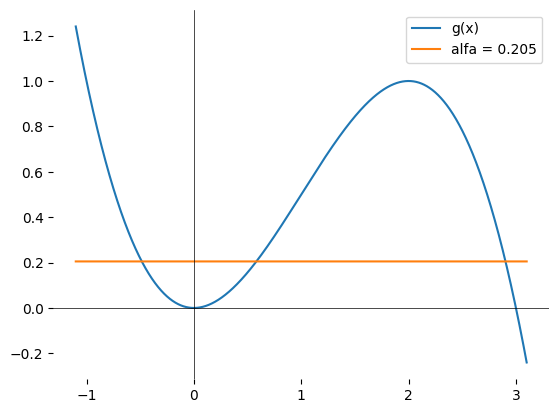

In [ ]:
def g(x):
  return 0.25*x*x*(3 - x)

def h(x):
  return alpha * np.ones_like(x) # um vetor do tamanho de x, com todos os valores iguais a 0.3

xx = np.linspace(-1.1, 3.1, 4201);                     # pontos para o gráfico (de -1.1 a 3.1 com espaçamento 0.001)
yy = 0.3 * np.ones(4201)                               # y = 0.3
plt.box(False)                                         # figura sem a caixa em volta
plt.plot(xx, g(xx), label="g(x)")                      # gráfico de g(x)
plt.plot(xx, h(xx), label='alfa = {}'.format(alpha))   # y = alpha
plt.axhline(0, color='black', linewidth=.5)            # eixo x
plt.axvline(0, color='black', linewidth=.5);           # eixo y
plt.legend();



**Formulação como um problema de zero de funções:**

Vamos reescrever esse problema em uma forma que permita a aplicação dos métodos estudados. Podemos escrever a equação (1) como
$$
    \frac{1}{4}x^2(3 -x) - \alpha = 0, \tag{2}
$$

Então, se definirmos a função
$$
  f(x) = \frac{1}{4}x^2(3 -x) - \alpha
$$

queremos resolver o seguinte problema: encontre o valor $x = \xi$ no qual $f(x)$ se anula, ou seja, encontre o zero de $f$. Claramente, também existem três valores de $x$ que resolvem esse problema. Observe o gráfico de $f$ abaixo, no caso do seu $\alpha$:


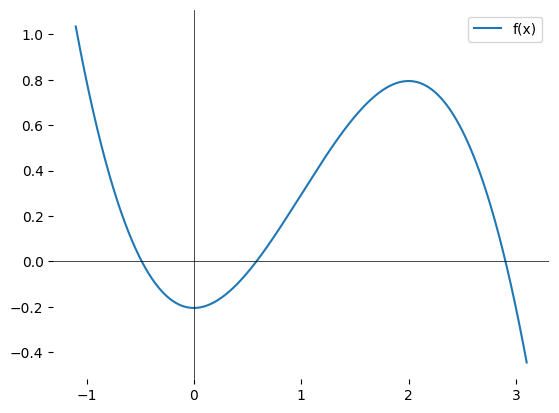

In [ ]:
def f(x):
  return 0.25*x*x*(3 - x) - alpha # a função

xx = np.linspace(-1.1, 3.1, 4201);                     # pontos para o gráfico (de -1.1 a 3.1 com espaçamento 0.001)
yy = alpha * np.ones(4201)                              # y = alpha
plt.box(False)                                         # figura sem a caixa em volta
plt.plot(xx, f(xx), label="f(x)")                      # gráfico de g(x)
plt.axhline(0, color='black', linewidth=.5)            # eixo x
plt.axvline(0, color='black', linewidth=.5);           # eixo y
plt.legend();

### Questão 1.1.

Quando resolvemos o problema de zeros de funções, é comum nos depararmos com situações em que a função estudada possui mais de uma raiz, como é o caso da função $f$ definida acima. No entanto, podemos estar interessados em encontrar apenas uma ou algumas das raízes; por exemplo, se apenas algumas delas forem fisicamente relevantes. Para isso, é importante escolher corretamente o intervalo de busca para aplicação dos métodos numéricos. No problema descrito acima, qual ou quais raízes de $f$ nos interessam? Por que as demais raízes podem ser ignoradas?

**Resposta:** As raízes no intervalo [0,2], as outras não possuem signifaco física para o problema


## 1.2. - Aproximação pelo método da dicotomia

Seja $f: \mathbb{R} \to \mathbb{R}$ e $a,b \in \mathbb{R}$ tais que $f(a) f(b) < 0$. Se $f$ é contínua em $[a,b]$, sabemos, pelo Teorema do Valor Intermediário, que existe uma raiz $\xi$ de $f$ em $(a,b)$. O método da dicotomia consiste em determinar iterativamente intervalos $[a_k,b_k]$, cada vez menores, nos quais $\xi$ está contido. Isso é feito da seguinte forma: começando com o intervalo $[a,b]$:


1. Calcule $f$ no ponto médio do intervalo, $x_m = \frac{a+b}{2} $  
2. Se $f(x_m) = 0$ ou algum critério de parada é satisfeito, termine o processo iterativo, sendo $x_m$ a aproximação obtida para $\xi$
3. Se $f(x_m) f(x_a) < 0$, então $\xi$ está em $(a,x_m)$, e definimos o novo intervalo $(a,x_m)$ (ou seja, $b$ recebe $x_m$). Caso contrário, $\xi$ está em $(x_m,b)$, e definimos o novo intervalo $(x_m,b)$ (ou seja, $a$ recebe $x_m$).
4. Volte ao passo 1.




### Questão 1.2.a
Implemente o método da dicotomia. O esqueleto da função está disponível abaixo, e estão indicadas as partes que precisam ser completadas. Ela recebe a função $f$, o intervalo inicial $[a,b]$, a tolerância $\varepsilon$ para um critério de parada e um número máximo de iterações. A função deve retornar a aproximação $x$ e um vetor contendo as aproximações obtidas em cada iteração. Como o algoritmo pode ser melhorado, em termos de custo computacional?

**Resposta:** Podemos checar quantas iteração serão necessária para chegar em uma valor aproximadamente desejável, assim não precisaremos fazer o loop "for" o que diminui o custo computacional do cálculo.

In [ ]:
def metodo_dicotomia(f, a, b, eps, nitermax):
  """
  Implementa o método da dicotomia para aproximar a raiz de f com precisão eps, partindo do intervalo inicial [a,b]

  Entradas:
  - f: função de R em R
  - a: extremidade esquerda do intervalo inicial
  - b; extremidade direita do intervalo inicial
  - eps: precisão desejada (a ser usada no critério de parada)
  - nitermax: número máximo de iterações

  Saídas:
  - x: raiz estimada após o critério de parada ser satisfeita ou o número máximo de iterações ser atingido
  - x_all: vetor (np.array) contendo as aproximações obtidas em cada iteração (pode ser construído usando a função np.append)
  """

  x_all = np.empty(0, dtype = float)   ## inicializa o vetor contendo todas as aproximações

  for i in range(nitermax):            ## iterações até um número máximo de iterações

    x = (a + b) / 2                   ## calcula a aproximação nessa iteração, em função do intervalo atual [a,b]
    x_all = np.append(x_all, x)        ## guarda a aproximação no vetor de aproximações

    if i > 1 and abs(x-x_all[i - 1]) < eps:                    ## critério de parada garantindo que o erro |x - \xi| seja menor que \epsilon
      break

    ## f calculada em x, a e b
    fx = f(x)
    fa = f(a)
    fb = f(b)

    if np.abs(fx) < eps:               ## critério de parada: se f calculada na aproximação for muito pequeno
      break

    ## Atualizar o intervalo em função do sinal de f(x)
    if fa*fx < 0:
      b = x
    else:
      a = x

  return x, x_all

### Questão 1.2.b

Escolha um intervalo inicial $[a,b]$ adequado para executar o método da dicotomia. Justifique sua resposta.

**Resposta:** A altura do recipiente deve variarar entre 0 e 2 $x$ raio do recipente. Portanto, o intervalo incial escolhido é $[0,2]$

### Questão 1.2.c.

Rode a célula abaixo para executar o método da bissecção. Escolhermos uma tolerância $\epsilon = 10^{-10}$. O algoritmo convergiu? Em caso positivo, quantas iterações fora necessárias para convergência? Qual foi a aproximação obtida para $\xi$? Ela parece razoável (por quê?)?

**Resposta:** O algoritmo convergiu e foram necessária 32 interações. A resposta parece razoável pois é um valor entre $[0,2]$ e caso fosse feito mais iterações a diferença seria menor que $10^{-10}$

In [ ]:
def f(x):
  return 0.25*x*x*(3 - x) - alpha # a função

## Intervalo inicial
a = 0
b = 2

## Tolerância e número máximo de iterações
eps = 1e-10
nitermax = 1000

## Execução do método
x_dicotomia, x_dicotomia_all = metodo_dicotomia(f, a, b, eps, nitermax)

## Impressão dos resultados
print("Aproximação obtida: {}".format(x_dicotomia) )
print("Número de iterações necessárias: {}".format(x_dicotomia_all.size) )


Aproximação obtida: 0.5823898403905332
Número de iterações necessárias: 32


## 1.3. - Aproximação pelo método do ponto fixo

Nesta seção, vamos considerar o método do ponto fixo $x_{k+1} = \phi(x_k)$, dado um chute inicial $x_0$, onde $\phi$ é a função de iteração. Vamos considerar a mesma função $f$ definida na seção anterior e as seguintes funções de iteração:

\begin{equation}
\phi_1(x) = 2\sqrt{\frac{\alpha}{3-x}}, \qquad \phi_2(x) = x + \frac{1}{4}x^2(3-x)-\alpha
\end{equation}

### Questão 1.3.a
Implemento o método do ponto fixo. O esqueleto da função está disponível abaixo, e estão indicadas as partes que precisam ser completadas. Ela recebe a função de iteração $\phi$, o chute inicial $x_0$, a tolerância $\varepsilon$ para o critério de parada e um número máximo de iterações. A função deve retornar a aproximação $x$ e um vetor contendo as aproximações obtidas em cada iteração.



In [ ]:
def metodo_ponto_fixo(phi, x0, eps, nitermax):
  """
  Implementa o método do ponto fixo para aproximar a raiz de f com precisão eps

  Entradas:
  - phi: função de R em R (função de iteração)
  - x0: chute inicial
  - eps: precisão desejada (a ser usada no critério de parada)
  - nitermax: número máximo de iterações

  Saídas:
  - x: raiz estimada após o critério de parada ser satisfeita ou o número máximo de iterações ser atingido
  - x_all: vetor (np.array) contendo as aproximações obtidas em cada iteração  (pode ser construído usando a função np.append)
  """


  x = x0                                     ## x: aproximação em cada iteração
  x_all = np.array([x0])                     ## inicializa o vetor contendo todas as aproximações

  for i in range(nitermax):                  ## iterações

    xold = x                                 ## guarda a aproximação da última iteração
    x = phi(x)                            ## atualiza a aproximação

    x_all = np.append(x_all, x)              ## guarda no vetor contendo todas as aproximações

    if np.abs(x-xold) / np.abs(xold) < eps:  ## criterio de parada: diferença relativa entre iterações sucessivas
      break

  return x, x_all

### Questão 1.3.b
Execute a célula abaixo para aproximar $\xi$ com uma precisão $\varepsilon = 10^{-10}$ pelo método do ponto fixo, considerando as duas funções de iteração definidas acima e partindo do chute inicial escolhido adequadamente. Há convergência em algum caso? Se sim, quantas iterações são necessárias? A aproximação obtida parece razoável (por quê?)?

**Resposta:** Houve convergência no primeiro 𝛟1 e foram necessária 12 iterações, e o resultado parece razoável pois está dentro do intervalo $[0,2]$ e conversa com o resultado obitdo em 1.2.c. O segundo resultado tem um intervalo mal definido e converge para um resultado indesejável.

In [ ]:
def phi_1(x):
  return np.sqrt(4 * alpha / (3-x))

def phi_2(x):
  return 0.25*x*x*(3.-x) + x -alpha

## Chute inicial
x0 = 0.5

## Tolerância e número máximo de iterações
eps = 1e-10
nitermax = 1000

## Execução do método
x_ponto_fixo_1, x_ponto_fixo_all1 = metodo_ponto_fixo(phi_1, x0, eps, nitermax)

## Impressão dos resultados
print("Usando phi1:")
print("Aproximação obtida: {}".format(x_ponto_fixo_1) )
print("Número de iterações necessárias: {}".format(x_ponto_fixo_all1.size) )
print("")

## Execução do método
x_ponto_fixo_2, x_ponto_fixo_all2 = metodo_ponto_fixo(phi_2, x0, eps, nitermax)

## Impressão dos resultados
print("Usando phi2:")
print("Aproximação obtida: {}".format(x_ponto_fixo_2) )
print("Número de iterações necessárias: {}".format(x_ponto_fixo_all2.size) )

Usando phi1:
Aproximação obtida: 0.5823898402743221
Número de iterações necessárias: 12

Usando phi2:
Aproximação obtida: -0.4850666141808315
Número de iterações necessárias: 19


### Questão 1.3.c

Execute a célula abaixo para plotar os gráficos de $f$, $\phi_1$, $\phi_2$ e $y=x$ no intervalo $[0,2]$. Que propriedades observadas nesses gráficos sugerem explicações para os resultados obtidos na execução do método do ponto fixo?

**Resposta:** É possível notar que a inclinação de phi2 é maior que 1 no intervalo [0,2]. Ou seja phi2 não vai convergir para aquele ponto fixo (caso ele exista) no intervalo. com isso a sequência phi2(x) não está bem definida, dando uma raiz indesejada O contrário ocorre com phi1(x)

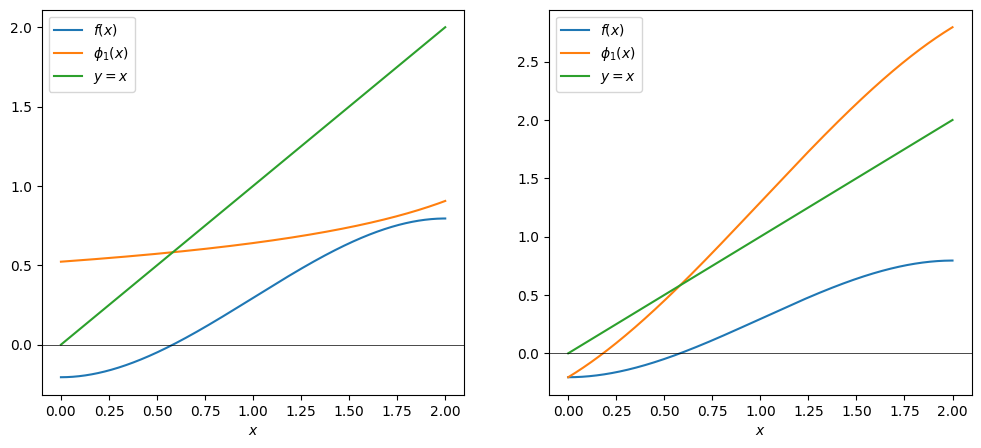

In [ ]:
xx = np.linspace(0., 2., 4201);                          ## pontos para o gráfico (de -1.1 a 3.1 com espaçamento 0.001)

fig,ax = plt.subplots(1,2, figsize = (12,5))             ## vamos plotar dois gráficos

## Primeiro gráfico: phi1
ax[0].plot(xx, f(xx), label = r'$f(x)$')                 ## plota f
ax[0].plot(xx, phi_1(xx), label = r'$\phi_1(x)$')        ## plota phi
ax[0].plot(xx, xx, label = r'$y = x$')                   ## plota y = x

## segundo gráfico: phi2
ax[1].plot(xx, f(xx), label = r'$f(x)$')                 ## plota f
ax[1].plot(xx, phi_2(xx), label = r'$\phi_1(x)$')        ## plota phi
ax[1].plot(xx, xx, label = r'$y = x$')                   ## plota y = x

## Em cada gráfico:
for i in range(2):
  ax[i].legend()                                         ## legenda
  ax[i].set_xlabel(r'$x$')                               ## nome do eixo x
  ax[i].axhline(0, color = 'black', linewidth = '0.5')   ## traça o eixo x

## 1.4. - Resolução pelo método de Newton

O método de Newton é um caso particular de método de ponto fixo. partindo de um chute inicial $x_0$, calculamos

\begin{equation}
  x_{k+1} = \phi(x_k)
\end{equation}

com

\begin{equation}
  \phi(x) = x - \frac{f(x)}{f'(x)}
\end{equation}

### Questão 1.4.a

Implemente o método de Newton. O esqueleto da função está disponível abaixo, e estão indicadas as partes que precisam ser completadas. Ela recebe a função $f$ e sua derivada $f'$, o chute inicial $x_0$, a tolerância $\varepsilon$ para o critério de parada e um número máximo de iterações. A função deve retornar a aproximação $x$ e um vetor contendo as aproximações obtidas em cada iteração.

**Atenção:** Observe que o método de Newton é um caso particular do método do ponto fixo. Assim, você pode simplificar a implementação do método de Newton simplesmente chamando a função do método do ponto fixo e fornecendo a função $\phi$ adequada.

In [ ]:
def metodo_newton(f, f_der, x0, eps, nitermax):
  """
  Implementa o método de newton para aproximar a raiz de f com precisão eps

  Entradas:
  - f: função de R em R
  - f_der: função de R em R, igual à primeira derivada de f
  - x0: chute inicial
  - eps: precisão desejada (a ser usada no critério de parada)
  - nitermax: número máximo de iterações

  Saídas:
  - x: raiz estimada após o critério de parada ser satisfeita ou o número máximo de iterações ser atingido
  - x_all: vetor (np.array) contendo as aproximações obtidas em cada iteração (pode ser construído usando a função np.append)
  """

  ## define a função phi que será usada no método da iteração
  def phi(x):
    return x - f(x)/f_der(x)

  ## chama a função implementando o método do ponto fixo
  x, x_all = metodo_ponto_fixo(phi, x0, eps, nitermax)

  return x, x_all

### Questão 1.4.b

Execute a célula abaixo para aproximar $\xi$ com uma precisão $\varepsilon = 10^{-10}$ pelo método de Newton, partindo de um chute inicial escolhido adequadamente. Repare que você deve completar a função *f_der* implementando a derivada de $f$. Há convergência? Se sim, quantas iterações são necessárias? A aproximação obtida parece razoável (por quê?)?

**Resposta:** Sim, o resultado convergiu e foram necessária apenas 12 iterações. o resultado parece raozável pois obtemos uma raiz entre 0 e 1

In [ ]:
alpha = 41/200
def f(x):
  return 0.25*x*x*(3 - x) - alpha # a função

def f_der(x):
  return 0.25*x*(6 - 2*x)             # a derivada da função

## Chute inicial
x0 = 0.6

## Tolerância e número máximo de iterações
eps = 1e-10
nitermax = 1000

## Execução do método
x_newton_1,x_newton_all_1 = metodo_newton(f, f_der, x0, eps, nitermax)

## Impressão dos resultados
print("Aproximação obtida: {}".format(x_newton_1) )
print("Número de iterações necessárias: {}".format(x_newton_all_1.size) )

Aproximação obtida: 0.5823898402820419
Número de iterações necessárias: 12


### Questão 1.4.c

Execute a célula abaixo para rodar novamente o método de Newton, mas agora ṕartindo do chute inicial $x_0 = 0.001$. Há convergência nesse caso? Se sim, quantas iterações são necessárias? A aproximação obtida parece razoável (por quê?)?

**Resposta:** Sim, foram necessária 22 iterações. A aproximação não é razoável pois o intervalos está fora da interpretação física do problema, apensar de ser um valor dentro de $f$

In [ ]:
## Chute inicial
x0 = .001

## Tolerância e número máximo de iterações
eps = 1e-10
nitermax = 1000

## Execução do método
x_newton_2,x_newton_all_2 = metodo_newton(f, f_der, x0, eps, nitermax)

## Impressão dos resultados
print("Aproximação obtida: {}".format(x_newton_2) )
print("Número de iterações necessárias: {}".format(x_newton_all_2.size) )

Aproximação obtida: 0.5823898402860535
Número de iterações necessárias: 22


### Questão 1.4.d

A função abaixo permite visualizar a interpretação geométrica do método de Newton. As duas células seguintes chamam essa função para os dois casos executados acima. Execute essas células e comente como a interpretação geométrica reflete os resultados observados nas duas questões anteriores, relacionando-os com os resultados teóricos de convergência do método de Newton. Talvez seja necessário ajustar os valores de xmin, xmax, ymin e ymax (limites do gráfico) para visualizar os resultados.

**Resposta:** Para a segunda implementação, foi escolhido um valor muito próximo de $0$ e fora do intervalo $[p,2]$ para ser $x_0$. Assim, acabamos por ter um valor um valor de $\phi_0(x_0)$ elevado, levando para a direita do intervalor $[p_2,∞+]$, sendo $p_2$ a raiz mais à direita. Dessa forma, a sequência convergiu para um valor próximo de 2,9, ao invés de simplesmente divergir. Por isso, a primeira implementação um valor de $x_0$ converge mais rápido para a raiz desejada

In [ ]:
def interpretacao_geometrica_metodo_newton(f, f_der, x_all, xlim, ylim):
  """
  Interpretação geométrica do método de Newton, dado um vetor de aproximações x_all

  Entradas:
  - f: função de R em R
  - f_der: função de R em R, igual à primeira derivada de f
  - x_all: vetor contendo as aproximações obtidas em cada iteração do método de newton
  - xlim = [xmin,xmax]: limites do gráfico na direção x
  - ylm = [ymin,ymax]: limites do grpafico na direção y
  """

  fig, ax = plt.subplots()                                ## cria a figura

  xx = np.linspace(xlim[0], xlim[1], 1000)                ## pontos no eixo x

  ax.plot(xx,f(xx), color = 'C0', label = r'$f(x)$')      ## Plota a função f

  ax.axhline(0, color = 'black')                          ## Desenha o eixo x

  for i in range(x_all.size):                                                             ## Para cada aproximação x_k
    x = x_all[i]                                                                          ## Obtém x_k
    ax.scatter(x,f(x), marker = 'o', color = 'C' + str(3 + i))                            ## Plota f(x_k)
    ax.plot([x,x-f(x)/f_der(x)], [f(x), 0], linestyle = '--', color = 'C' + str(3 + i))   ## Plota a reta tangente a f em x_k
    ax.plot([x,x],[0,f(x)], linestyle = '--', color = 'C' + str(3 + i), lw = 0.5)         ## Plota uma reta vertical entre o eixo x e o ponto (x_k, f(x_k))

    ## Escreve o nome dos pontos x_k
    if ylim[0] < -0.5:
      coord_annotate = (x,-0.1)
    else:
      coord_annotate = (x,-0.025)
    ax.annotate(r'$x_{}$'.format(i), coord_annotate)

  ax.legend()         ## Legenda
  ax.set_xlim(xlim)   ## Limites do gráfico na direção x
  ax.set_ylim(ylim)   ## Limites do gráfico na direção y

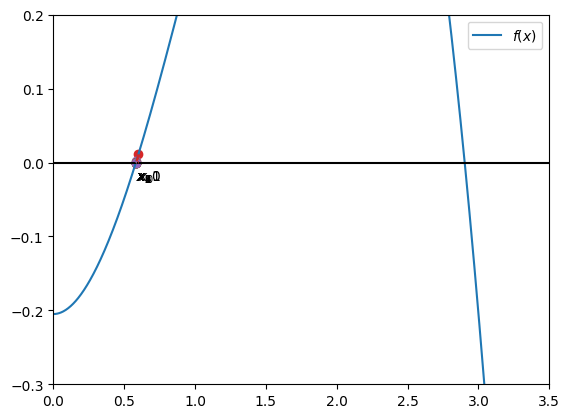

In [ ]:
## Primeira execução do método de Newton

## Limites do gráfico
xmin = 0.
xmax = 3.5
ymin = -.3
ymax = 0.2

interpretacao_geometrica_metodo_newton(f,f_der,x_newton_all_1,[xmin,xmax],[ymin,ymax])

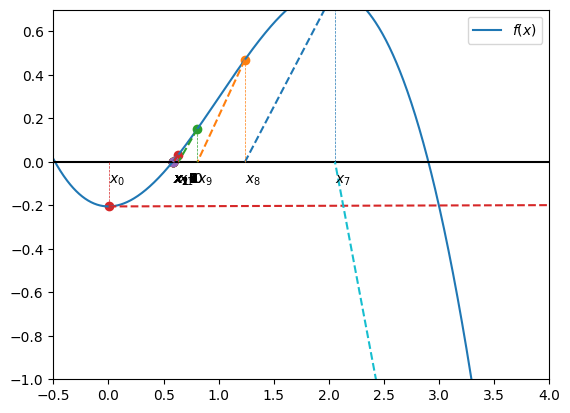

In [ ]:
## Segunda execução do método de Newton

## Limites do gráfico
xmin = -.5
xmax = 4.
ymin = -1.
ymax = .7

interpretacao_geometrica_metodo_newton(f,f_der,x_newton_all_2,[xmin, xmax],[ymin, ymax])

## 1.5. Comparação entre os métodos

### Questão 1.5.

A célula abaixao plota o valor de $f(x_k)$ ao longo das iterações, considerando as aproximações obtidas pelo método da dicotomia, do ponto fixo e de Newton (nos casos em que há convergência para a solução desejada). O que você observa em relação aos comportamentos de convergência dos métodos? Levando em conta os resultados observados nas questões anteriores, quais são as vantagens e desvantagens de cada um dos métodos?

**Resposta:** O método de newton converge mais rápido ao valor pois é um método de convergência quadrática, enquanto os outro dois são de convergência linear. O método da dictomia é mais simples de se implementado, porém demanda mais iterações para obter um valor aproximado. O méotodo do ponto fixo pode ser mais útil quando é escolhido uma função phi adequada.

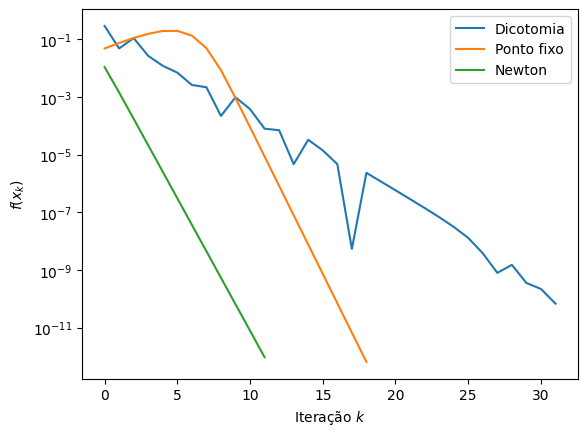

In [ ]:
fig, ax = plt.subplots()                                        ## Cria a figura

ax.plot(np.abs(f(x_dicotomia_all)), label = 'Dicotomia')        ## Plota resultados da dicotomia
ax.plot(np.abs(f(x_ponto_fixo_all2)), label = 'Ponto fixo')     ## Plota resultados do ponto fixo
ax.plot(np.abs(f(x_newton_all_1)), label = 'Newton')            ## Plota resultados de Newton

ax.set_yscale('log')                                            ## Escala logarítmica no eixo y
ax.set_xlabel("Iteração " + r'$k$')                             ## Nome do eixo x
ax.set_ylabel(r'$f(x_k)$')                                      ## Nome do eixo
ax.legend()                                                     ## Legenda

# Parte 2: Método de Newton para sistemas não lineares

Nesta segunda parte, vamos apresentar e fazer uma implementação simples do **método do Newton para sistemas não-lineares**. Esta implementação será usada posteriormente no EP6.

No caso de funções $f:\mathbb{R} \to \mathbb{R}$ (como o caso estudado na Parte 1), o método de Newton assume a forma

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

Vamos agora considerar funções $f: \mathbb{R}^n \to \mathbb{R}^n$ na forma

$$
f(\mathbf{x}) =
\left(
  \begin{array}{c}
  f_1(\mathbf{x})\\
  \vdots\\
  f_n(\mathbf{x})
  \end{array}
\right) \in \mathbb{R}^n,
\qquad
\mathbf{x} :=
\left(
  \begin{array}{c}
  x_1\\
  \vdots\\
  x_n
  \end{array}
\right) \in \mathbb{R}^n
$$

ou seja, funções que dependem de $n$ variáveis $x_1, \dots, x_n$ e que retornam vetores com $n$ componentes $f_1, \dots, f_n$, onde cada uma das componentes é função das $n$ variáveis. Um exemplo no caso $n = 2$ é o sistema

$$
\begin{cases}
4x_1^2 - 20x_1 + \frac{1}{4}x_2^2 + 8 = 0\\
\frac{1}{2}x_1x_2^2 + 2x_1 - 5x_2 + 8 = 0 \tag{3}
\end{cases}
$$

ou, usando a notação acima,

$$
f(\mathbf{x}) =
\left(
  \begin{array}{c}
  f_1(\mathbf{x})\\
  f_2(\mathbf{x})
  \end{array}
\right) =
\left(
  \begin{array}{c}
  4x_1^2 - 20x_1 + \frac{1}{4}x_2^2 + 8\\
  \frac{1}{2}x_1x_2^2 + 2x_1 - 5x_2 + 8
  \end{array}
\right) =
\left(
  \begin{array}{c}
  0\\
  0
  \end{array}
\right),
\qquad
\mathbf{x} :=
\left(
  \begin{array}{c}
  x_1\\
  x_2
  \end{array}
\right)
$$

Podemos usar o método de Newton para encontrar o ponto $(x_1,x_2)^T = (\xi_1, \xi_2)^T$ no qual $f$ se anula. Para funções $f:\mathbb{R}\to\mathbb{R}$, o método de Newton assume a forma

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - [J_f(\mathbf{x}_k)]^{-1}f(\mathbf{x}_k)
\tag{4}
$$

onde $J_f(\mathbf{x})$ é a matriz Jacobiana de $f$, que contém as derivadas parciais de cada $f_i$ em relação a cada $x_i$:

$$
J_f(\mathbf{x}):=
\left(
  \begin{array}{c c c}
    \frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \frac{\partial f_n}{\partial x_1} & \dots & \frac{\partial f_n}{\partial x_n}
  \end{array}
\right) \in \mathbb{R}^{n \times n}
$$


Observe que, em cada iteração do método de Newton, precisamos inverter a matriz Jacobiana. Ao invés disso, podemos multiplicar os dois lados da equação (4) por $J_f(\mathbf{x}_k)$ para obter

$$
J_f(\mathbf{x}_k)\mathbf{x}_{k+1} = J_f(\mathbf{x}_k)\mathbf{x}_k - f(\mathbf{x}_k)
\tag{5}
$$

A equação (5) é um sistema linear cuja incógnita é o vetor $\mathbf{x}_{k+1}$. O lado direito é conhecido, pois $\mathbf{x}_{k}$ já foi calculado na iteração anterior. Assim, ao invés de trabalhar com (4) para obter $\mathbf{x}_{k+1}$ por meio da inversão de uma matriz, trabalhamos com (5) para obter $\mathbf{x}_{k+1}$ por meio de um sistema linear.

Nas questões a seguir, vamos implementar o método de Newton para encontrar o zero do problema (3). Neste primeiro momento, vamos usar a biblioteca NumPy para resolver o sistema linear (5). Posteriormente no curso, iremos fazer nossa própria implementação de métodos para resolução de sistemas lineares.

## Questão 2.a

Como o problema (3) tem dimensão 2, a matriz Jacobiana tem tamanho 2x2. Determine os coeficientes dessa matriz, em função de $x_1$ e $x_2$:

**Resposta:**
- Coeficiente (1,1): $8x_1 -20$
- Coeficiente (1,2): $1/2x_2$
- Coeficiente (2,1): $1/2x_2 + 2$
- Coeficiente (2,2): $x_1x_2 -5$

## Questão 2.b
Implemente o método de Newton multidimensional. O esqueleto da função está disponível abaixo, e estão indicadas as partes que precisam ser completadas. Ela recebe a função $f$ e uma função implementando a matriz Jacobiana $J_f$, o chute inicial $x_0 \in \mathbb{R}^n$, a tolerância $\varepsilon$ para o critério de parada e um número máximo de iterações. A função deve retornar a aproximação $x$ e uma matriz $(N,2)$ contendo as aproximações $(x_1^k, x_2^k)$ obtidas em cada iteração, onde $N$ é o número de iterações.

In [ ]:
def metodo_newton_multidimensao(f, Jf, x0, eps, nitermax):
  """
  Implementa o método de newton para aproximar a raiz de f com precisão eps

  Entradas:
  - f: função de R em R
  - f_der: função de R em R, igual à primeira derivada de f
  - x0: chute inicial
  - eps: precisão desejada (a ser usada no critério de parada)
  - nitermax: número máximo de iterações

  Saídas:
  - x: raiz estimada após o critério de parada ser satisfeita ou o número máximo de iterações ser atingido
  - x_all: vetor (np.array) contendo as aproximações obtidas em cada iteração (pode ser construído usando a função np.append)
  """

  x = np.copy(x0)                           ## x: aproximação em cada iteração
  x_all = np.copy(x0.reshape((1,2)))        ## initializa a matriz contendo todas as aproximações

  for i in range(nitermax):                 ## iterações

    xold = np.copy(x)                       ## guarda a aproximação da iteração anterior

    fxk = f(x)                      ## f calculada em x_k
    Jfxk = Jf(x)                     ## Jf calculada em x_k

    b = np.dot(Jfxk,x) - fxk                ## calcula o lado direito do sistema linear (5)
    x = np.linalg.solve(Jfxk,b)             ## resolva o sistema linear Jf*x = b

    x_all = np.vstack((x_all, x))           ## guarda a aproximação na matriz

    if np.max(np.abs(x-xold)) < eps:        ## critério de parada: diferença entre iterações sucessivas
      break

  return x, x_all

## Questão 2.c

Execute a célula abaixo para aproximar $(\xi_1,\xi_2)^T$ com uma precisão $\varepsilon = 10^{-10}$ pelo método de Newton, considerando, partindo do chute inicial $\mathbf{x}_0 = (0,0)^T$. Repare que você deve completar as funções *f* e *Jf* implementando $f$ e sua matriz Jacobiana. Há convergência? Se sim, quantas iterações são necessárias? A aproximação obtida parece razoável (por quê?)?

**Resposta:** Houve convergêncai em 10 iterações. A aproximação parece razoável pos os valores são $(0.4999999999999979,1.999999999999966)$ e os valores a serem encontrados são: $(0.5,2)$

In [ ]:
def f(x):               ## a função f = (f_1,f_2)^T
  val = np.empty(2, dtype = float)                        ## cria um vetor de tamanho 2
  val[0] = 4*x[0]*x[0] -20*x[0] +1/4*x[1]*x[1]+8                                   ## f_1(x)
  val[1] = 1/2*x[0]*x[1]*x[1]+2*x[0]-5*x[1]+8                                ## f_2(x)
  return val

def Jf(x):             ## a matriz jacobiana de f
  val = np.empty((2,2), dtype = float)                    ## cria uma matriz 2x2
  val[0,0] = 8*x[0]-20                                 ## Componente (1,1)
  val[0,1] = 1/2*x[1]                                 ## Componente (1,2)
  val[1,0] = 1/2*x[1]+2                                 ## Componente (2,1)
  val[1,1] = x[0]*x[1]-5                                 ## Componente (2,2)
  return val

## Tolerância e número máximo de iterações
eps = 1e-10
nitermax = 1000

## Chute inicial = (0,0)^T
x0 = np.zeros(2,dtype = float)

## Execução do método
x_newton_sistema, x_newton_sistema_all = metodo_newton_multidimensao(f, Jf, x0, eps, nitermax)

## Impressão dos resultados
print("Aproximação obtida: ({},{})".format(x_newton_sistema[0],x_newton_sistema[1]) )
print("Número de iterações necessárias: {}".format(x_newton_sistema_all.shape[0]) )

Aproximação obtida: (0.4999999999999979,1.999999999999966)
Número de iterações necessárias: 10
